In [3]:
from pandas import read_json

data = read_json('https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json')
data.tail()

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
1342,Master Bedroom,4,4,1.739907,4.703960,0.166677,0.487452,1.074033,0.166677,2.992362,4.703960,1.216172
1343,Master Bedroom 2,4,4,0.530908,0.786997,0.101973,0.323746,0.614770,0.101973,0.738071,0.786997,0.670290
1344,Zimmer I,4,4,0.880569,1.221873,0.362600,0.823587,1.120810,0.362600,0.937550,1.221873,0.490739
1345,Hallway Bathroom,6,6,24.923452,64.266820,0.064699,24.857904,64.123596,0.064699,24.988999,64.266820,0.074356
1346,Bedroom 4,4,4,0.387328,0.762659,0.166426,0.349720,0.730373,0.205136,0.424936,0.762659,0.166426


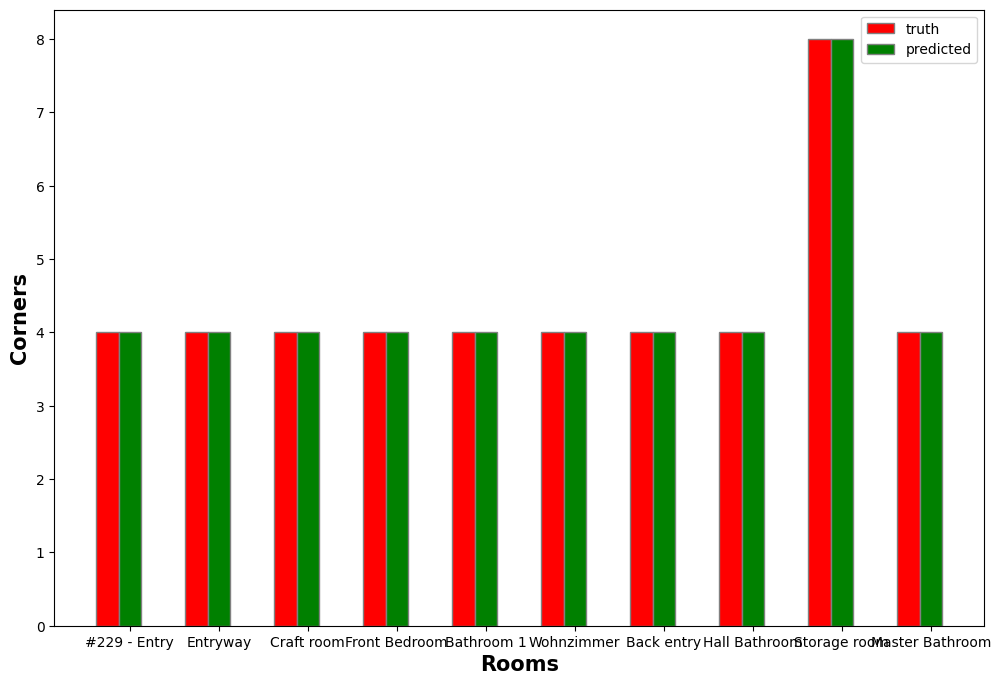

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 

rows = data.sample(10)

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# Set position of bar on X axis 
br1 = np.arange(len(rows['rb_corners'].tail(10))) 
br2 = [x + barWidth for x in br1] 

# Make the plot
plt.bar(br1, rows['rb_corners'].tail(10), color ='r', width = barWidth, 
        edgecolor ='grey', label ='truth') 
plt.bar(br2, rows['gt_corners'].tail(10), color ='g', width = barWidth, 
        edgecolor ='grey', label ='predicted') 

# Adding Xticks 
plt.xlabel('Rooms', fontweight ='bold', fontsize = 15) 
plt.ylabel('Corners', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(rows['rb_corners'].tail(10)))], 
        rows['name'].tail(10))

plt.legend()
plt.show() 


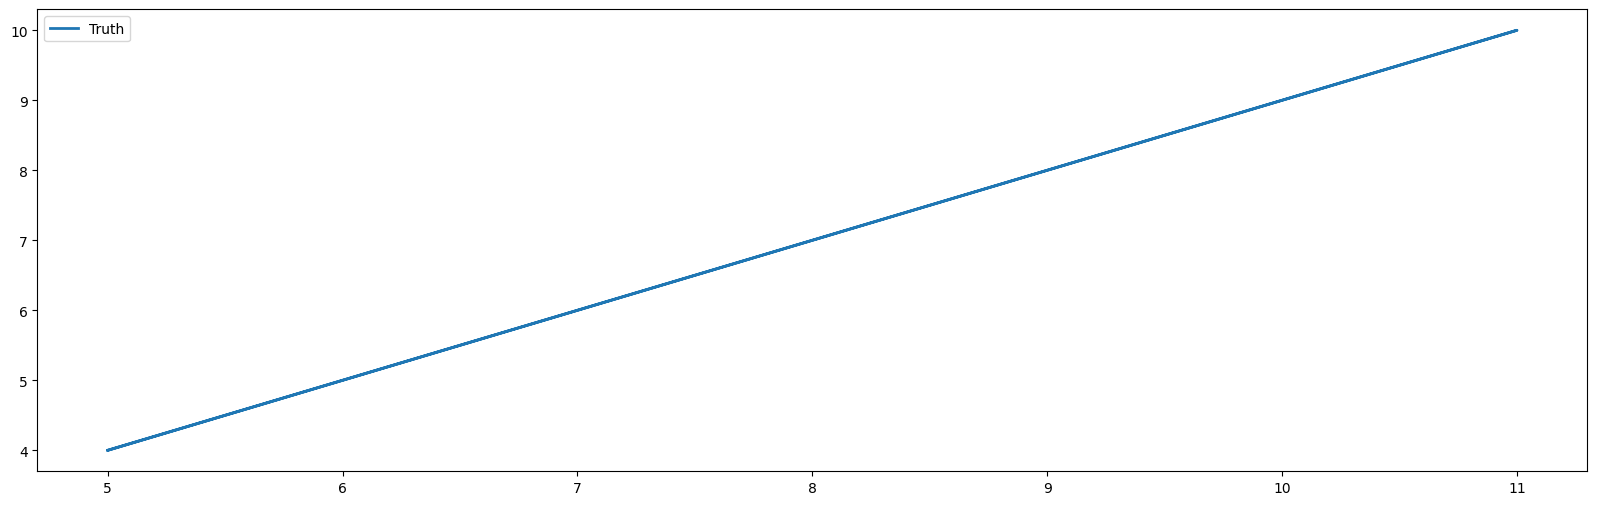

In [29]:
x = np.arange(len(data['rb_corners']))

fig = plt.subplots(figsize=(20, 6))
plt.plot(data['gt_corners'] + 1, data['rb_corners'], linewidth=2, label='Truth')
# plt.plot(x, data['gt_corners'] + 1, linewidth=2.0, label='Predicted')

plt.legend()
plt.show()

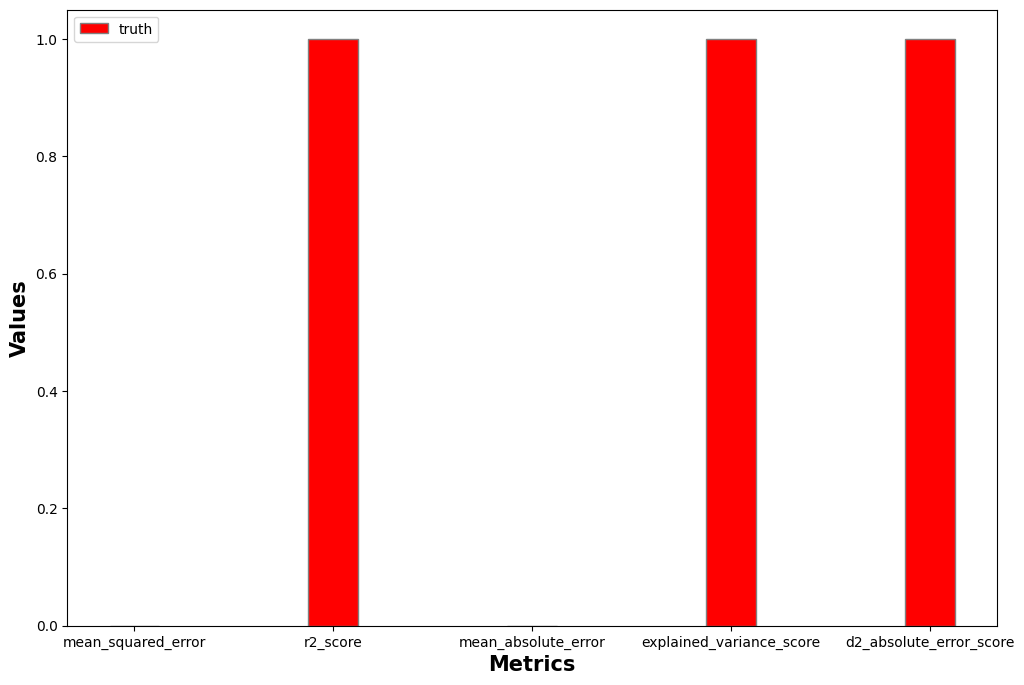

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, d2_absolute_error_score

evaluations_functions = [
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    explained_variance_score,
    d2_absolute_error_score,
]

evaluations = [evaluations_functions[i](data['rb_corners'], data['gt_corners'])
              for i in range(len(evaluations_functions))]

barWidth = 0.25
figure = plt.subplots(figsize =(12, 8)) 

# Set position of bar on X axis 
br1 = np.arange(len(evaluations)) 

# Make the plot
plt.bar(br1, evaluations, color ='r', width = barWidth, 
        edgecolor ='grey', label ='truth') 

# Adding Xticks 
plt.xlabel('Metrics', fontweight ='bold', fontsize = 15) 
plt.ylabel('Values', fontweight ='bold', fontsize = 15) 
plt.xticks([r for r in range(len(evaluations))], 
        map(lambda x: x.__name__, evaluations_functions))

plt.legend()
plt.show() 
